# 패키지 불러오기

In [1]:
%matplotlib inline
import pandas as pd   
import matplotlib
import matplotlib as mpl          
import matplotlib.pyplot as plt    
import numpy as np
from sklearn.linear_model import LinearRegression
import seaborn as sns
import matplotlib.font_manager as fm

from matplotlib import rc
import re
import networkx as nx
import matplotlib.cm as cm
font_name = fm.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()

rc('font', family=font_name)

matplotlib.rc('font', family='Malgun Gothic') 
matplotlib.rcParams['axes.unicode_minus'] = False

In [2]:
미국면적 = pd.read_csv('./data/states_data/미국 면적.csv',encoding='CP949')
미국인구 = pd.read_csv('./data/states_data/미국 인구.csv',encoding='CP949')
미국집값상승률 = pd.read_csv('./data/states_data/미국 집값 상승률.csv',encoding='CP949')
미국집값 = pd.read_csv('./data/states_data/미국 집값.csv',encoding='CP949')
미국이주율 = pd.read_csv('./data/states_data/미국이주율.csv',encoding='CP949')

미국집값=미국집값.set_index('state')
미국이주율=미국이주율.set_index('state')
미국집값상승률=미국집값상승률.set_index('state')
미국인구=미국인구.set_index('state')
미국면적=미국면적.set_index('state')

미국집값상승률1=미국집값상승률[미국집값상승률['period']=='2020-Q4']
미국집값상승률2=미국집값상승률[미국집값상승률['period']=='2010-Q4']
미국집값상승률=pd.DataFrame(미국집값상승률1['index_sa']-미국집값상승률2['index_sa'])


미국데이터= pd.concat([(미국인구['population']),(미국면적['km2'])],axis=1)
미국데이터['인구밀도']=미국데이터['population']/미국데이터['km2']
미국데이터['이주율']=미국이주율['1000명당 이주율']
미국데이터['집값상승률']=(미국집값상승률)
미국데이터['미국집값']=미국집값['single-family']
미국데이터['미국집값']=미국데이터['미국집값']*1115.13/100000
미국데이터=미국데이터.drop(['D.C'])


In [3]:
국내집값 = pd.read_csv('./data/korea_data/국내집값.csv',encoding='CP949')
국내집값=국내집값[국내집값['지역별(2)'].isin(['서울','인천','경기','부산','대구','광주','대전','울산','세종','강원','충북','충남','전북','전남','경북','경남','제주'])]
국내집값=국내집값.set_index('지역별(2)')
국내집값=국내집값.loc[:,['2015. 10','2015. 11','2015. 12',
         '2016. 01','2016. 02','2016. 03','2016. 04','2016. 05','2016. 06','2016. 07','2016. 08','2016. 09','2016. 10','2016. 11','2016. 12',
         '2017. 01','2017. 02','2017. 03','2017. 04','2017. 05','2017. 06','2017. 07','2017. 08','2017. 09','2017. 10','2017. 11','2017. 12',
         '2018. 01','2018. 02','2018. 03','2018. 04','2018. 05','2018. 06','2018. 07','2018. 08','2018. 09','2018. 10','2018. 11','2018. 12',
         '2019. 01','2019. 02','2019. 03','2019. 04','2019. 05','2019. 06','2019. 07','2019. 08','2019. 09','2019. 10','2019. 11','2019. 12',
         '2020. 01','2020. 02','2020. 03','2020. 04','2020. 05','2020. 06','2020. 07','2020. 08','2020. 09','2020. 10','2020. 11','2020. 12',
         '2021. 01','2021. 02']]
국내집값=국내집값.fillna(3000)

국내집값=국내집값.astype(int)
국내집값=국내집값
국내인구밀도 = pd.read_csv('./data/korea_data/국내인구밀도.csv',encoding='CP949')
국내인구밀도=국내인구밀도.set_index('지역')
국내인구밀도=국내인구밀도.astype(int)
국내인구밀도['2020인구밀도']=국내인구밀도['2020인구밀도']*1000
국내인구밀도=국내인구밀도.drop(['수도권'])

In [4]:
def mean_norm(df_input):
    return df_input.apply(lambda x: (x-x.mean())/ x.std(), axis=0)


# 인구 밀도와 집값 (한국 & 미국)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


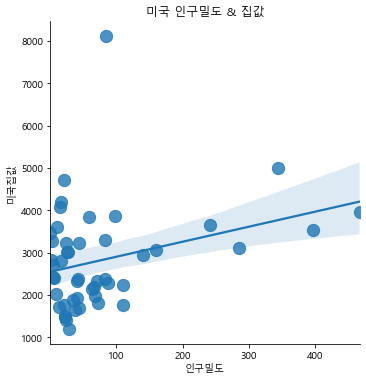

In [5]:
data = pd.concat([(미국데이터['인구밀도']),(미국데이터['미국집값'])],axis=1)
data.drop(data.index[8],inplace=True)
data.drop(data.index[10],inplace=True)
g=sns.lmplot('인구밀도','미국집값',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title("미국 인구밀도 & 집값")
plt.show(g)

In [6]:
from scipy import stats
from statsmodels.formula.api import ols, glm 
import statsmodels.api as sm
data=mean_norm(data)
m1 = ols ( '인구밀도~미국집값', data=data).fit()
m1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   인구밀도   R-squared:                       0.093
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     4.732
Date:                Wed, 29 Dec 2021   Prob (F-statistic):             0.0348
Time:                        16:38:18   Log-Likelihood:                -65.254
No. Observations:                  48   AIC:                             134.5
Df Residuals:                      46   BIC:                             138.3
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8.327e-17      0.139   5.99e-16      1.000      -0.280       0.280
미국집값           0.3054      0.140      2.175      0.035       0.023       0.588
==============================================================================
Omnibus:                       30.768   Durbin-Watson:                   1.940
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.889
Skew:                           1.928   Prob(JB):                     6.00e-14
Kurtosis:                       6.947   Cond. No.                         1.01
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [7]:
data[['인구밀도','미국집값']].corr()

,인구밀도,미국집값
인구밀도,1.000000,0.305405
미국집값,0.305405,1.000000


Text(0.5, 1.0, '미국 집값')

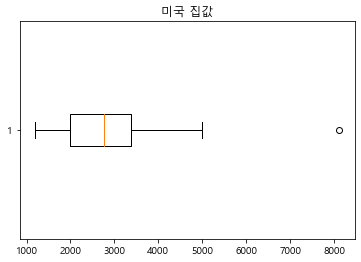

In [8]:
plt.boxplot(미국데이터['미국집값'], vert=False)
plt.title("미국 집값")

Text(0.5, 1.0, '미국 인구밀도')

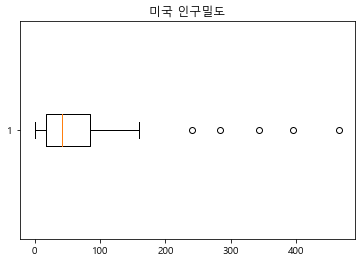

In [9]:
plt.boxplot(미국데이터['인구밀도'], vert=False)
plt.title("미국 인구밀도")

Text(0.5, 1.0, '미국 집값')

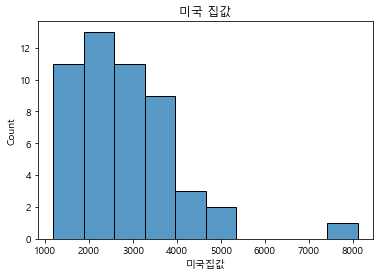

In [10]:
sns.histplot(x='미국집값', data=미국데이터)
plt.title("미국 집값")

Text(0.5, 1.0, '미국 집값')

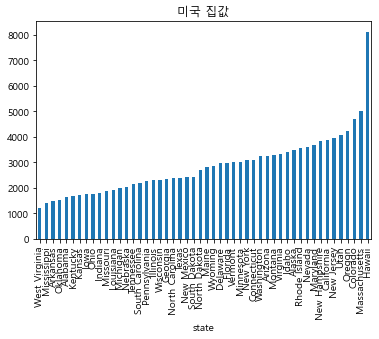

In [11]:
(미국데이터['미국집값']).sort_values().plot(kind='bar')
plt.title("미국 집값")

Text(0.5, 1.0, '미국 인구')

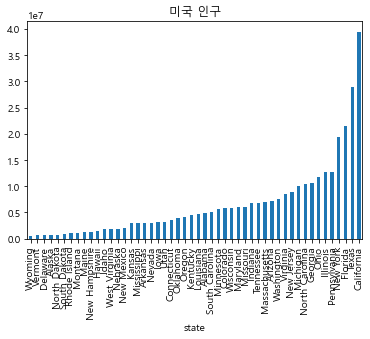

In [12]:
(미국데이터['population']).sort_values().plot(kind='bar')
plt.title("미국 인구")

Text(0.5, 1.0, '미국 인구 x 집값')

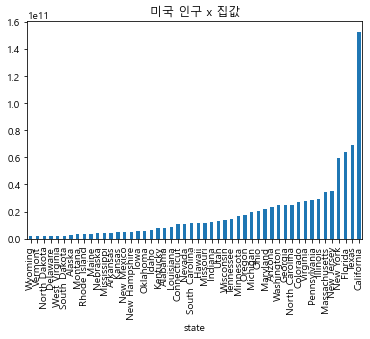

In [13]:
(미국데이터['미국집값']*미국데이터['population']).sort_values().plot(kind='bar')
plt.title("미국 인구 x 집값")

In [14]:
np.std((미국데이터['미국집값']*미국데이터['population']))

24629468421.64708

In [15]:
(미국데이터['미국집값']*미국데이터['population']).sum()/(미국데이터['population'].sum())

2835.3142699897176

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


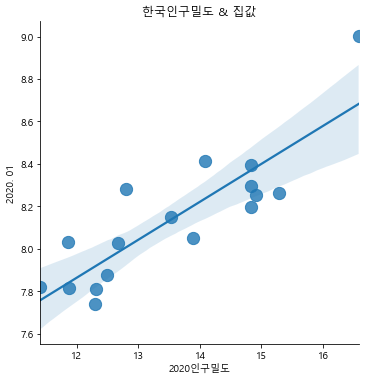

In [16]:
data = pd.concat([np.log(국내인구밀도['2020인구밀도']),np.log(국내집값['2020. 01'])],axis=1)
g=sns.lmplot('2020인구밀도','2020. 01',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('한국인구밀도 & 집값')
plt.show(g)

In [17]:
data=data.rename({'2020인구밀도':'인구밀도','2020. 01':'집값'},axis='columns')
data=mean_norm(data)

In [18]:
m1 = ols ( '인구밀도~집값', data=data).fit()
m1.summary()

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   인구밀도   R-squared:                       0.732
Model:                            OLS   Adj. R-squared:                  0.714
Method:                 Least Squares   F-statistic:                     41.00
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           1.19e-05
Time:                        16:38:24   Log-Likelihood:                -12.410
No. Observations:                  17   AIC:                             28.82
Df Residuals:                      15   BIC:                             30.49
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -6.245e-17      0.130  -4.82e-16      1.000      -0.276       0.276
집값             0.8557      0.134      6.403      0.000       0.571       1.140
==============================================================================
Omnibus:                        0.721   Durbin-Watson:                   0.998
Prob(Omnibus):                  0.697   Jarque-Bera (JB):                0.654
Skew:                          -0.120   Prob(JB):                        0.721
Kurtosis:                       2.070   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [19]:
data[['인구밀도','집값']].corr()

,인구밀도,집값
인구밀도,1.000000,0.855653
집값,0.855653,1.000000


Text(0.5, 1.0, '한국 집값')

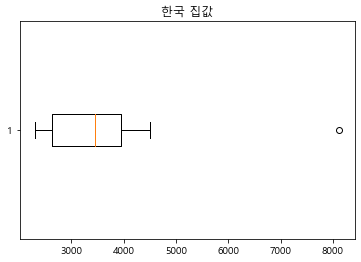

In [20]:
plt.boxplot(국내집값['2020. 01'], vert=False)
plt.title('한국 집값')

Text(0.5, 1.0, '한국 인구밀도')

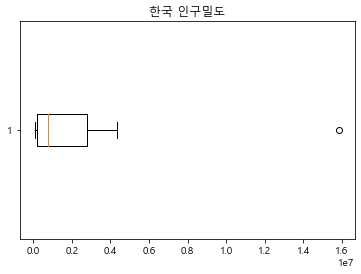

In [21]:
plt.boxplot(국내인구밀도['2020인구밀도'], vert=False)
plt.title('한국 인구밀도')

Text(0.5, 1.0, '한국 집값')

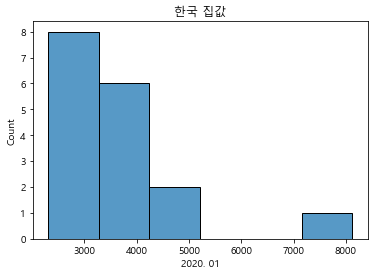

In [22]:
sns.histplot(x='2020. 01', data=국내집값)
plt.title('한국 집값')

Text(0.5, 1.0, '한국 집값')

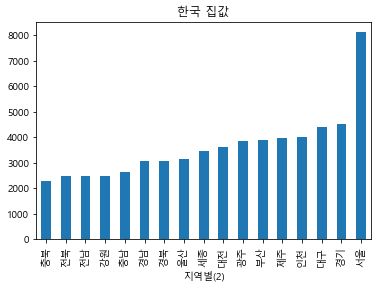

In [23]:
(국내집값['2020. 01']).sort_values().plot(kind='bar')
plt.title('한국 집값')

Text(0.5, 1.0, '한국 인구')

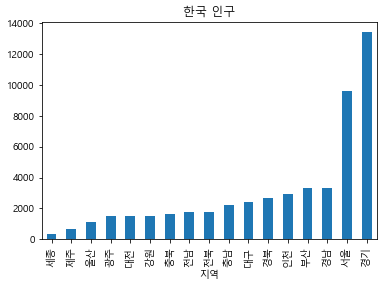

In [24]:
(국내인구밀도['2020인구']).sort_values().plot(kind='bar')
plt.title('한국 인구')

Text(0.5, 1.0, '한국 인구 x 집값')

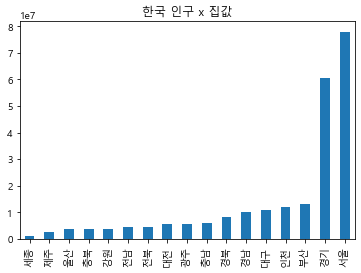

In [25]:
(국내인구밀도['2020인구']*국내집값['2020. 01']).sort_values().plot(kind='bar')
plt.title('한국 인구 x 집값')

Text(0.5, 1.0, '한국 인구 x 집값')

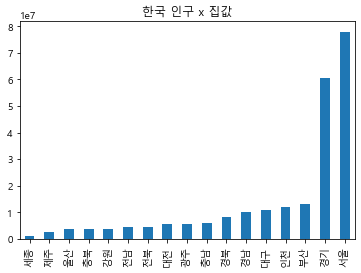

In [26]:
((국내인구밀도['2020인구'])*국내집값['2020. 01']).sort_values().plot(kind='bar')
plt.title('한국 인구 x 집값')

# 국내 인구 이동

In [27]:
국내이동1=pd.read_csv('./data/migration/국내이동.csv',encoding='CP949')

Text(0.5, 1.0, '전입 수')

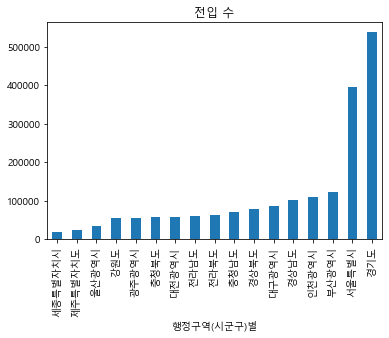

In [28]:
국내전입= 국내이동1.loc[(국내이동1['항목']=='총전입')&((국내이동1['행정구역(시군구)별']=='세종특별자치시')|(국내이동1['행정구역(시군구)별']=='서울특별시')|(국내이동1['행정구역(시군구)별']=='부산광역시')|(국내이동1['행정구역(시군구)별']=='대구광역시')|(국내이동1['행정구역(시군구)별']=='대전광역시')|(국내이동1['행정구역(시군구)별']=='인천광역시')|(국내이동1['행정구역(시군구)별']=='울산광역시')|(국내이동1['행정구역(시군구)별']=='광주광역시')|(국내이동1['행정구역(시군구)별']=='충청북도')|(국내이동1['행정구역(시군구)별']=='충청남도')|(국내이동1['행정구역(시군구)별']=='전라북도')|(국내이동1['행정구역(시군구)별']=='전라남도')|(국내이동1['행정구역(시군구)별']=='경상북도')|(국내이동1['행정구역(시군구)별']=='경상남도')|(국내이동1['행정구역(시군구)별']=='강원도')|(국내이동1['행정구역(시군구)별']=='경기도')|(국내이동1['행정구역(시군구)별']=='제주특별자치도'))]
국내전입=국내전입.set_index('행정구역(시군구)별')
국내전입=(국내전입['2020. 1/4']+국내전입['2020. 2/4']+국내전입['2020. 3/4']+국내전입['2020. 4/4'])/4
국내전입.sort_values().plot(kind='bar')

plt.title('전입 수')

Text(0.5, 1.0, '전출 수')

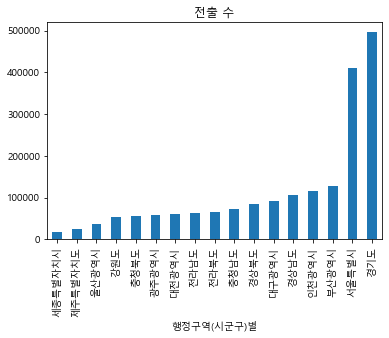

In [29]:
국내전출= 국내이동1.loc[(국내이동1['항목']=='총전출')&((국내이동1['행정구역(시군구)별']=='세종특별자치시')|(국내이동1['행정구역(시군구)별']=='서울특별시')|(국내이동1['행정구역(시군구)별']=='부산광역시')|(국내이동1['행정구역(시군구)별']=='대구광역시')|(국내이동1['행정구역(시군구)별']=='대전광역시')|(국내이동1['행정구역(시군구)별']=='인천광역시')|(국내이동1['행정구역(시군구)별']=='울산광역시')|(국내이동1['행정구역(시군구)별']=='광주광역시')|(국내이동1['행정구역(시군구)별']=='충청북도')|(국내이동1['행정구역(시군구)별']=='충청남도')|(국내이동1['행정구역(시군구)별']=='전라북도')|(국내이동1['행정구역(시군구)별']=='전라남도')|(국내이동1['행정구역(시군구)별']=='경상북도')|(국내이동1['행정구역(시군구)별']=='경상남도')|(국내이동1['행정구역(시군구)별']=='강원도')|(국내이동1['행정구역(시군구)별']=='경기도')|(국내이동1['행정구역(시군구)별']=='제주특별자치도'))]
국내전출=국내전출.set_index('행정구역(시군구)별')
국내전출=(국내전출['2020. 1/4']+국내전출['2020. 2/4']+국내전출['2020. 3/4']+국내전출['2020. 4/4'])/4
국내전출.sort_values().plot(kind='bar')
plt.title('전출 수')

Text(0.5, 1.0, '전출-전입 수')

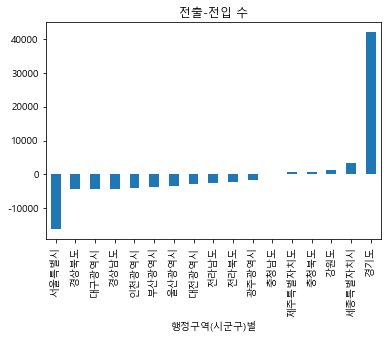

In [30]:
(국내전입-국내전출).sort_values().plot(kind='bar')
plt.title('전출-전입 수')

In [31]:
국내인구=국내인구밀도['2020인구']
국내인구=국내인구.rename({'세종':'세종특별자치시','서울':'서울특별시','부산':'부산광역시','대구':'대구광역시','대전':'대전광역시','광주':'광주광역시','울산':'울산광역시','인천':'인천광역시','경기':'경기도','강원':'강원도','충북':'충청북도','충남':'충청남도','전북':'전라북도','전남':'전라남도','경북':'경상북도','경남':'경상남도','제주':'제주특별자치도'},axis='index')


Text(0.5, 1.0, '전입 수 / 인구 수')

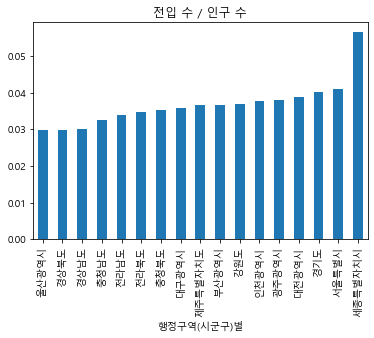

In [32]:
(국내전입/(국내인구*1000)).sort_values().plot(kind='bar')
plt.title('전입 수 / 인구 수')

Text(0.5, 1.0, '전출 수 / 인구 수')

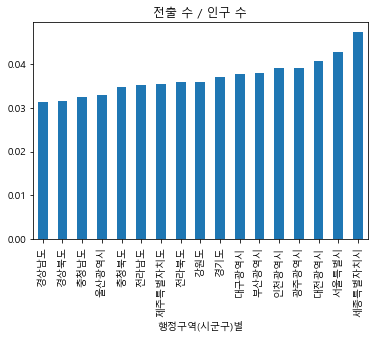

In [33]:
(국내전출/(국내인구*1000)).sort_values().plot(kind='bar')
plt.title('전출 수 / 인구 수')

Text(0.5, 1.0, '(전출 수 - 전입 수) / 인구 수')

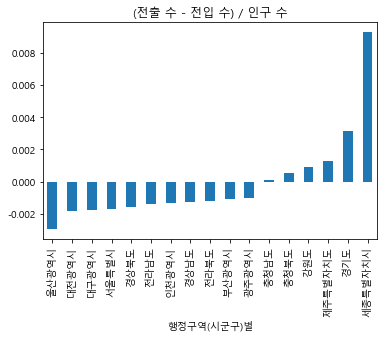

In [34]:
((국내전입-국내전출)/(국내인구*1000)).sort_values().plot(kind='bar')
plt.title('(전출 수 - 전입 수) / 인구 수')

Text(0.5, 1.0, '인구 수')

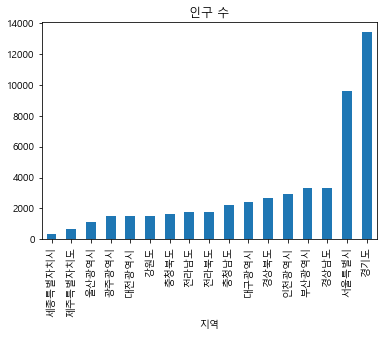

In [35]:
국내인구.sort_values().plot(kind='bar')
plt.title('인구 수')

In [36]:
국내전출입=((국내전입-국내전출)/국내인구*1000)
국내전출입=국내전출입.to_frame(name='value')
국내전출입

,value
행정구역(시군구)별,
서울특별시,-1688.450323
부산광역시,-1072.592703
대구광역시,-1739.871848
인천광역시,-1334.124026
광주광역시,-1022.009409
대전광역시,-1849.500000
울산광역시,-2978.947368
세종특별자치시,9330.229226
경기도,3140.115628


In [37]:
국내집값=국내집값.rename({'세종':'세종특별자치시','서울':'서울특별시','부산':'부산광역시','대구':'대구광역시','대전':'대전광역시','광주':'광주광역시','울산':'울산광역시','인천':'인천광역시','경기':'경기도','강원':'강원도','충북':'충청북도','충남':'충청남도','전북':'전라북도','전남':'전라남도','경북':'경상북도','경남':'경상남도','제주':'제주특별자치도'},axis='index')


In [38]:

국내이동2 = pd.read_csv('./data/migration/국내이동2.csv',encoding='CP949')
국내이동2=국내이동2.loc[(국내이동2['항목']=='순이동자수')&(국내이동2['전출지별']!='전국')&(국내이동2['전입지별']!='전국')]
                                        
국내이동2['2020']=국내이동2['2020. 01 월']+국내이동2['2020. 02 월']+국내이동2['2020. 03 월']+국내이동2['2020. 04 월']+국내이동2['2020. 05 월']+국내이동2['2020. 06 월']+국내이동2['2020. 07 월']+국내이동2['2020. 08 월']+국내이동2['2020. 09 월']+국내이동2['2020. 10 월']+국내이동2['2020. 11 월']+국내이동2['2020. 12 월']
국내이동2_1=국내이동2[국내이동2['2020']>0]

국내이동피벗=pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 11 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 12 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 01 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 02 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 03 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 04 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 05 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 06 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 07 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 08 월')+pd.pivot_table(국내이동2,index='전출지별',columns='전입지별',values='2020. 09 월')

국내이동피벗2=국내이동피벗/(국내인구)

국내이동피벗

전입지별,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
전출지별,,,,,,,,,,,,,,,,,
강원도,0,-1317,-775,-1413,-254,-861,274,-539,-982,281,-580,-2386,-489,-69,-163,240,-770
경기도,1317,0,-11569,-14969,-6465,-12410,-7609,-10790,-208671,528,-5649,-32905,-4886,-6453,2552,-7447,-335
경상남도,775,11569,0,742,290,2271,1618,-4167,13661,616,-1070,1341,1098,572,573,1811,1386
경상북도,1413,14969,-742,0,84,-370,2301,1632,11840,1010,-4192,834,219,361,386,2424,2352
광주광역시,254,6465,-290,-84,0,-126,723,74,8008,589,-32,660,-5832,-604,83,993,449
대구광역시,861,12410,-2271,370,126,0,1232,1525,12497,706,-646,1029,76,53,529,1490,1332
대전광역시,-274,7609,-1618,-2301,-723,-1232,0,-536,8001,13183,-333,202,-719,-1306,206,-466,1007
부산광역시,539,10790,4167,-1632,-74,-1525,536,0,15117,698,-4844,1149,164,355,10,1327,589
서울특별시,982,208671,-13661,-11840,-8008,-12497,-8001,-15117,0,603,-5794,2457,-5760,-6988,853,-3265,-3247


In [39]:
국내이동피벗2.round(2)

,강원도,경기도,경상남도,경상북도,광주광역시,대구광역시,대전광역시,부산광역시,서울특별시,세종특별자치시,울산광역시,인천광역시,전라남도,전라북도,제주특별자치도,충청남도,충청북도
전출지별,,,,,,,,,,,,,,,,,
강원도,0.00,-0.10,-0.23,-0.53,-0.17,-0.36,0.18,-0.16,-0.10,0.81,-0.51,-0.81,-0.28,-0.04,-0.24,0.11,-0.47
경기도,0.87,0.00,-3.45,-5.64,-4.34,-5.13,-5.07,-3.23,-21.73,1.51,-4.96,-11.15,-2.77,-3.60,3.81,-3.38,-0.21
경상남도,0.51,0.86,0.00,0.28,0.19,0.94,1.08,-1.25,1.42,1.77,-0.94,0.45,0.62,0.32,0.86,0.82,0.85
경상북도,0.93,1.12,-0.22,0.00,0.06,-0.15,1.53,0.49,1.23,2.89,-3.68,0.28,0.12,0.20,0.58,1.10,1.44
광주광역시,0.17,0.48,-0.09,-0.03,0.00,-0.05,0.48,0.02,0.83,1.69,-0.03,0.22,-3.31,-0.34,0.12,0.45,0.28
대구광역시,0.57,0.93,-0.68,0.14,0.08,0.00,0.82,0.46,1.30,2.02,-0.57,0.35,0.04,0.03,0.79,0.68,0.82
대전광역시,-0.18,0.57,-0.48,-0.87,-0.49,-0.51,0.00,-0.16,0.83,37.77,-0.29,0.07,-0.41,-0.73,0.31,-0.21,0.62
부산광역시,0.36,0.80,1.24,-0.61,-0.05,-0.63,0.36,0.00,1.57,2.00,-4.25,0.39,0.09,0.20,0.01,0.60,0.36
서울특별시,0.65,15.57,-4.08,-4.46,-5.38,-5.17,-5.33,-4.52,0.00,1.73,-5.08,0.83,-3.27,-3.90,1.27,-1.48,-1.99


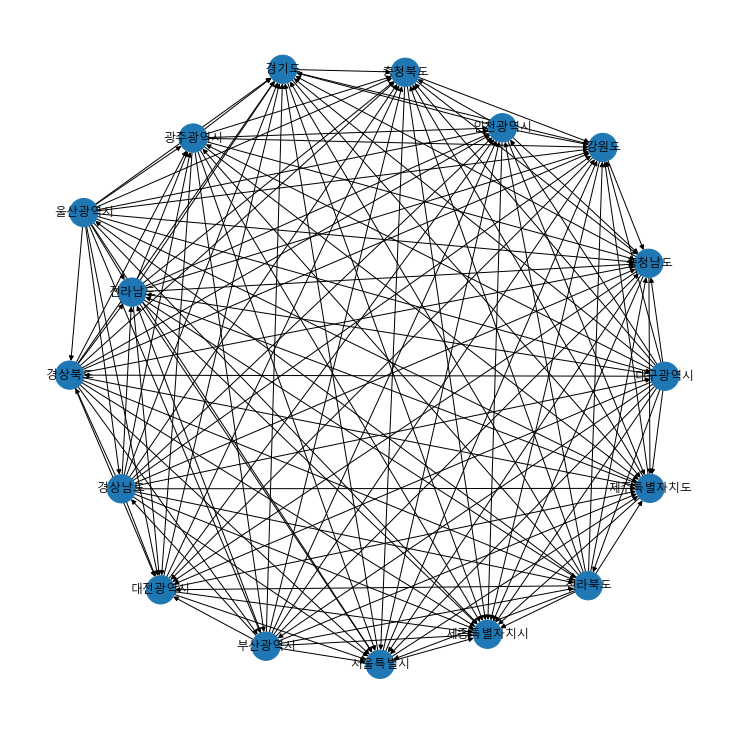

In [40]:

G_net = nx.from_pandas_edgelist(국내이동2_1, source = '전출지별', target = '전입지별', edge_attr = '2020',create_using = nx.DiGraph())

d = dict(G_net.degree)
plt.figure(figsize=(10,10))
pos = nx.spring_layout(G_net,10)
#for edge in G_net.edges(data='2020'):
nx.draw(G_net, pos,font_family=font_name, node_size = [(50*v) for v in d.values()], with_labels = True)
plt.show()

<AxesSubplot:xlabel='전입지별', ylabel='전출지별'>

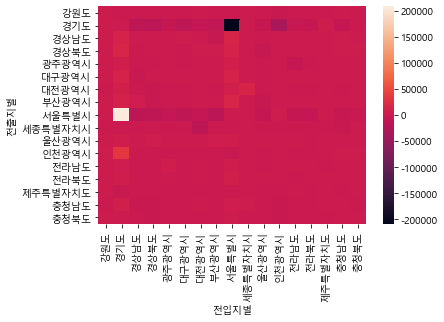

In [41]:
sns.heatmap(국내이동피벗  )

# 국내 이주 분석

In [42]:
이주분석 = pd.read_csv('./data/migration/이주분석.csv',encoding='CP949')
이주분석=이주분석.set_index('응답자특성')
이주분석=이주분석.astype(float)
이주분석

,이주 계획 있음17,이주 계획 없음17,창녕군 내 타 읍면17,타 시군 농촌17,타 시군 도시17,1년 이내17,1~3년 이내17,3~5년 이내17,5년 이후17,경제적 문제17,...,3~5년 이내19,5년 이후19,경제적 문제19,주택 문제19,자녀 교육19,생활 편의시설 부족19,환경문제19,사업장 또는 직장19,마을주민과의 갈등문제19,기타19
응답자특성,,,,,,,,,,,,,,,,,,,,,
소계,14.9,85.1,16.1,17.2,66.7,16.1,43.5,18.3,22.0,9.1,...,21.0,41.0,17.5,8.5,10.5,13.0,8.5,33.0,4.0,5.0
귀농(농가),8.0,92.0,36.6,22.0,41.5,14.6,48.8,17.1,19.5,9.8,...,14.3,57.1,31.4,8.6,8.6,2.9,17.1,14.3,11.4,5.7
귀촌(비농가),19.6,80.4,10.3,15.9,73.8,16.6,42.1,18.6,22.8,9.0,...,22.4,37.6,14.6,8.5,10.9,15.2,6.7,37.0,2.4,4.9
남자,16.2,83.8,15.1,18.9,66.0,15.1,39.6,23.6,21.7,10.4,...,20.6,40.2,15.0,7.5,8.4,12.2,8.4,41.1,3.7,3.7
여자,13.4,86.6,17.5,15.0,67.5,17.5,48.8,11.3,22.5,7.5,...,21.5,41.9,20.4,9.7,12.9,14.0,8.6,23.7,4.3,6.5
19~29세,36.5,63.5,6.5,3.2,90.3,19.4,38.7,32.3,9.7,14.7,...,13.6,36.4,4.6,4.6,9.1,4.6,4.6,59.1,0.0,13.6
30~39세,31.3,68.7,13.0,4.3,82.6,10.9,45.7,15.2,28.3,4.3,...,23.3,39.5,9.3,14.0,23.3,9.3,4.7,39.5,0.0,0.0
40~49세,15.1,84.9,18.2,22.7,59.1,22.7,36.4,22.7,18.2,9.1,...,22.2,33.3,8.3,8.3,22.2,22.2,2.8,36.1,0.0,0.0
50~59세,11.3,88.7,22.7,27.3,50.0,15.9,43.2,15.9,25.0,9.1,...,21.7,45.0,28.3,6.7,1.7,10.0,11.7,31.7,6.7,3.3


<AxesSubplot:ylabel='50~59세'>

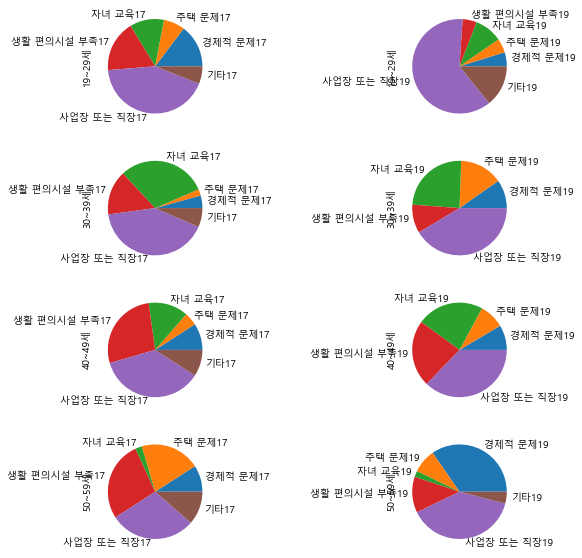

In [43]:
import platform
matplotlib.rc('font', family='Malgun Gothic') 
matplotlib.rcParams['axes.unicode_minus'] = False
plt.rcParams["figure.figsize"] = (10,10)
plt.subplot(421)
이주분석.loc['19~29세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(422)
이주분석.loc['19~29세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')

plt.subplot(423)
이주분석.loc['30~39세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(424)
이주분석.loc['30~39세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')

plt.subplot(425)
이주분석.loc['40~49세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(426)
이주분석.loc['40~49세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')

plt.subplot(427)
이주분석.loc['50~59세',['경제적 문제17','주택 문제17','자녀 교육17','생활 편의시설 부족17','사업장 또는 직장17','기타17']].plot(kind='pie')

plt.subplot(428)
이주분석.loc['50~59세',['경제적 문제19','주택 문제19','자녀 교육19','생활 편의시설 부족19','사업장 또는 직장19','기타19']].plot(kind='pie')


<AxesSubplot:ylabel='50~59세'>

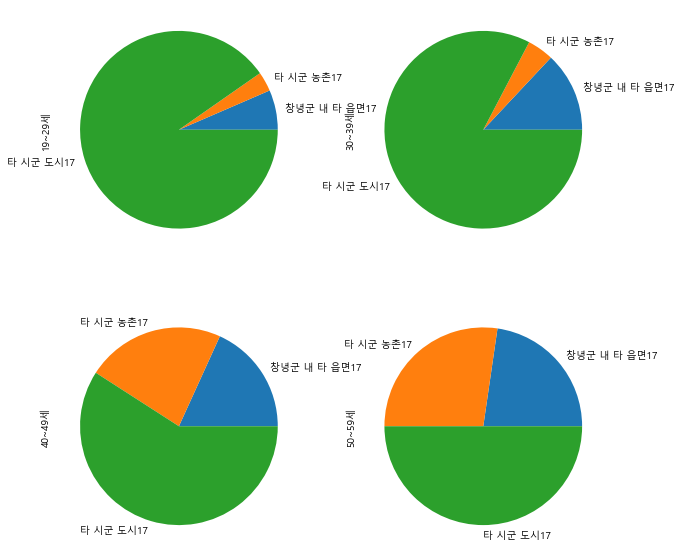

In [44]:
plt.subplot(221)
이주분석.loc['19~29세',['창녕군 내 타 읍면17','타 시군 농촌17','타 시군 도시17']].plot(kind='pie')
plt.subplot(222)
이주분석.loc['30~39세',['창녕군 내 타 읍면17','타 시군 농촌17','타 시군 도시17']].plot(kind='pie')
plt.subplot(223)
이주분석.loc['40~49세',['창녕군 내 타 읍면17','타 시군 농촌17','타 시군 도시17']].plot(kind='pie')
plt.subplot(224)
이주분석.loc['50~59세',['창녕군 내 타 읍면17','타 시군 농촌17','타 시군 도시17']].plot(kind='pie')

In [45]:
국내이동1_2= pd.read_csv('./data/migration/국내이동.csv',encoding='CP949')
국내이동1_2=국내이동1_2.set_index('행정구역(시군구)별')

In [46]:
국내총전출=국내이동1_2.loc[국내이동1_2['항목']=='총전출']
국내총전입=국내이동1_2.loc[국내이동1_2['항목']=='총전입']

In [47]:
국내총전입=국내총전입.drop(['항목','단위'],axis=1)
국내총전출=국내총전출.drop(['항목','단위'],axis=1)
국내총이동=국내총전입/국내총전출

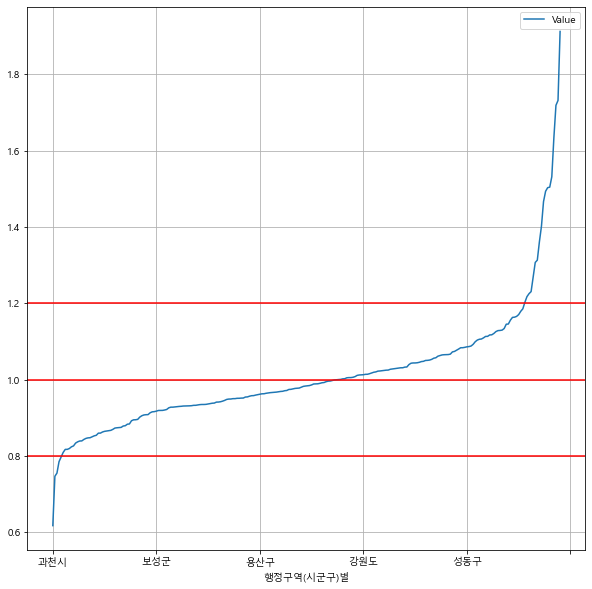

In [48]:

국내총이동17=(국내총이동['2017. 1/4']+국내총이동['2017. 2/4']+국내총이동['2017. 3/4']+국내총이동['2017. 4/4'])/4
국내총이동17=국내총이동17.to_frame()
국내총이동17.columns=['Value']
국내총이동17=국내총이동17.sort_values(by=['Value'])
국내총이동17=국내총이동17.dropna()
국내총이동17.plot()

plt.axhline(y=1, color='r')
plt.axhline(y=1.2, color='r')
plt.axhline(y=0.8, color='r')
plt.grid(True)

<AxesSubplot:xlabel='행정구역(시군구)별'>

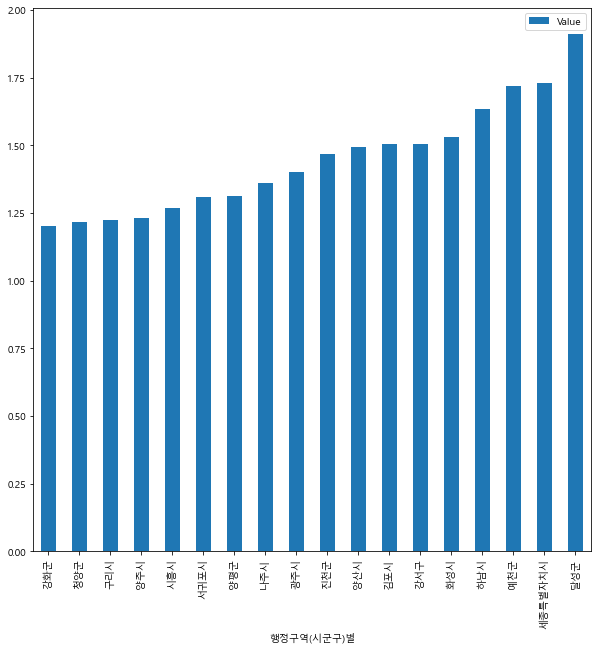

In [49]:
국내총이동17.loc[국내총이동17['Value']>=1.2].plot(kind='bar')

<AxesSubplot:xlabel='행정구역(시군구)별'>

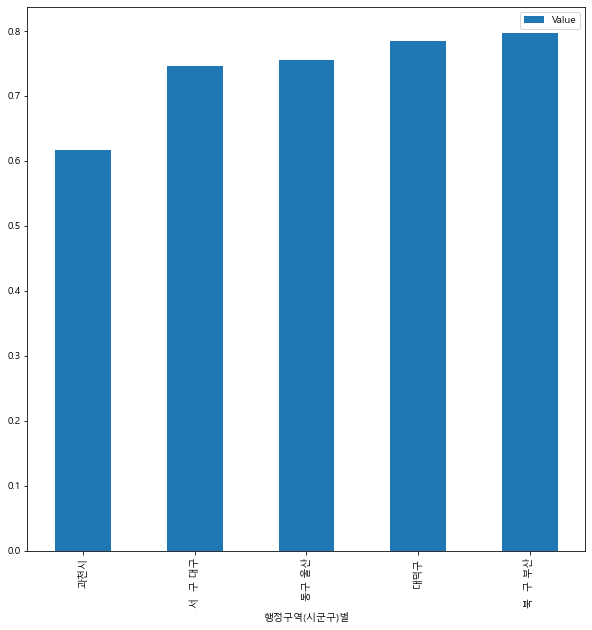

In [50]:
국내총이동17.loc[국내총이동17['Value']<=0.8].plot(kind='bar')

# 이주 요인 분석

In [51]:
경제활동인구 = pd.read_csv('./data/factors/경제활동인구.csv',encoding='CP949')
산업체= pd.read_csv('./data/factors/산업체.csv',encoding='CP949')
생활만족도= pd.read_csv('./data/factors/생활만족도.csv',encoding='CP949')
여가프로그램= pd.read_csv('./data/factors/여가프로그램.csv',encoding='CP949')
여가시설= pd.read_csv('./data/factors/여가시설.csv',encoding='CP949')
취업자= pd.read_csv('./data/factors/취업자.csv',encoding='CP949')
프렌차이즈= pd.read_csv('./data/factors/프렌차이즈.csv',encoding='CP949')
대학생= pd.read_csv('./data/factors/대학생.csv',encoding='CP949')
대학= pd.read_csv('./data/factors/대학.csv',encoding='CP949')
경제활동인구=경제활동인구.set_index('시도별')
#산업체=산업체.set_index('행정구역별')
산업체1=산업체.set_index('산업별')
생활만족도=생활만족도.set_index('행정구역별')
여가시설=여가시설.loc[여가시설['통계분류(1)']=='17개 시도별']
여가시설=여가시설.set_index('통계분류(2)')
여가프로그램=여가프로그램.loc[여가프로그램['통계분류(1)']=='17개 시도별']
여가프로그램=여가프로그램.set_index('통계분류(2)')
취업자=취업자.set_index('졸업지역별(1)')
프렌차이즈=프렌차이즈.set_index('시도별')
대학=대학.set_index('행정구역별')
대학생=대학생.set_index('행정구역별')

### 요인 1. 경제활동

In [52]:
경제활동인구=경제활동인구.loc[경제활동인구['교육정도별']=='계']
경제활동인구=경제활동인구.drop(['계'])
생활만족도=생활만족도.loc[생활만족도['특성별']=='계']
경제활동인구

,교육정도별,경제활동인구 (천명),비경제활동인구 (천명),경제활동참가율 (%)
시도별,,,,
서울특별시,계,5288,3244,62.0
부산광역시,계,1710,1235,58.1
대구광역시,계,1252,834,60.0
인천광역시,계,1632,916,64.0
광주광역시,계,779,498,61.0
대전광역시,계,814,470,63.4
울산광역시,계,581,383,60.3
세종특별자치시,계,185,107,63.3
경기도,계,7178,4357,62.2


In [53]:
인구변동=(국내전입-국내전출)/(국내인구*1000)
인구변동=인구변동.to_frame()
인구변동.columns=['value']

국내인구=국내인구.to_frame()
국내인구.columns=['인구']
인구변동

,value
행정구역(시군구)별,
서울특별시,-0.001688
부산광역시,-0.001073
대구광역시,-0.001740
인천광역시,-0.001334
광주광역시,-0.001022
대전광역시,-0.001850
울산광역시,-0.002979
세종특별자치시,0.009330
경기도,0.003140


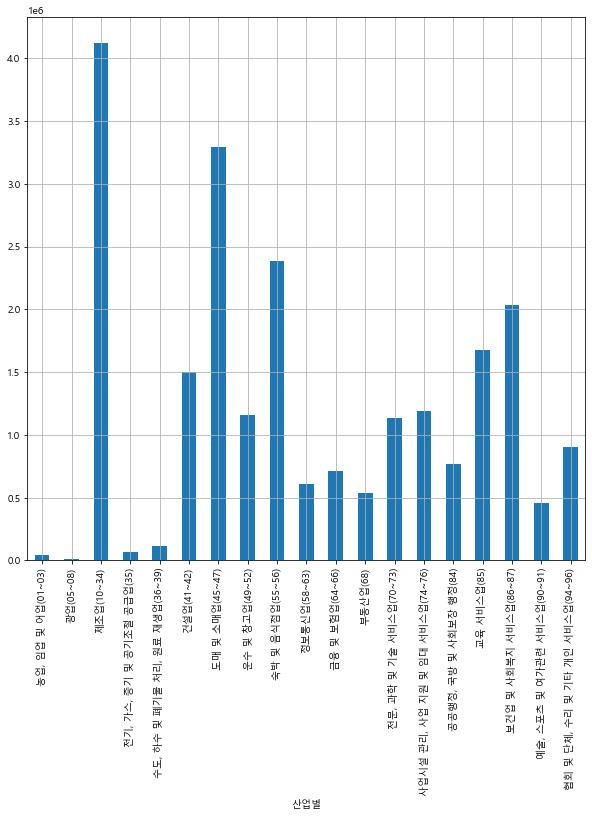

In [54]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='전국']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

In [55]:
산업체1

,행정구역별,종사자규모별,항목,단위,2010 년,2011 년,2012 년,2013 년,2014 년,2015 년,2016 년,2017 년,2018 년,2019 년
산업별,,,,,,,,,,,,,,
전체 산업,전국,계,사업체수,개,3355459,3470023,3602461,3676859,3812800,3874156,3950169,4019872,4103172,4176549
전체 산업,전국,계,종사자수,명,17646973,18093127,18569256,19173387,19899697,20889239,21259126,21626904,22234776,22723272
전체 산업,전국,1 - 4명,사업체수,개,2804612,2879668,2963367,3005238,3099808,3125589,3173185,3228202,3274152,3322812
전체 산업,전국,1 - 4명,종사자수,명,5075161,5211805,5298493,5377943,5586586,5602005,5705519,5847700,5878444,6041327
전체 산업,전국,5 - 9명,사업체수,개,283153,316658,366257,384596,414513,434111,454806,466829,491200,511446
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",제주특별자치도,300 - 499명,종사자수,명,0,0,0,0,0,0,0,0,0,0
"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",제주특별자치도,500 - 999명,사업체수,개,0,0,0,0,0,0,1,0,0,0
"협회 및 단체, 수리 및 기타 개인 서비스업(94~96)",제주특별자치도,500 - 999명,종사자수,명,0,0,0,0,0,0,0,0,0,0


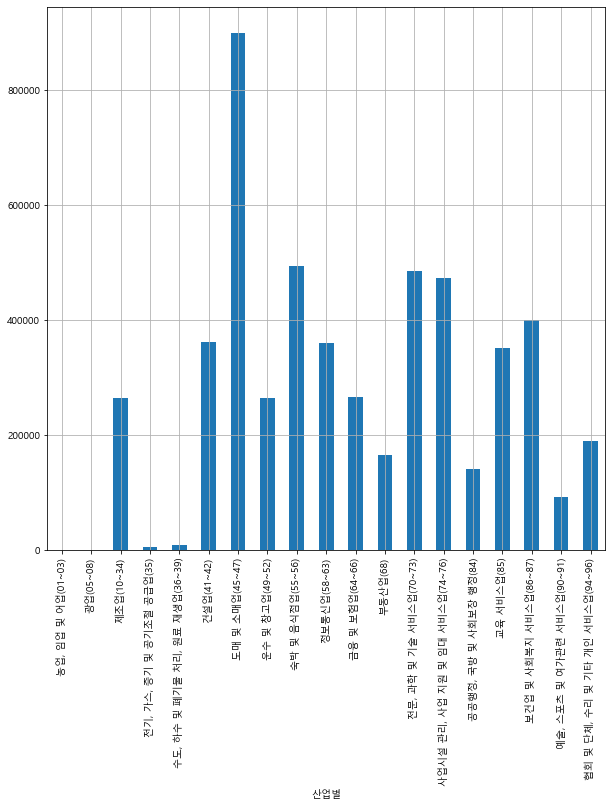

In [56]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='서울특별시']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

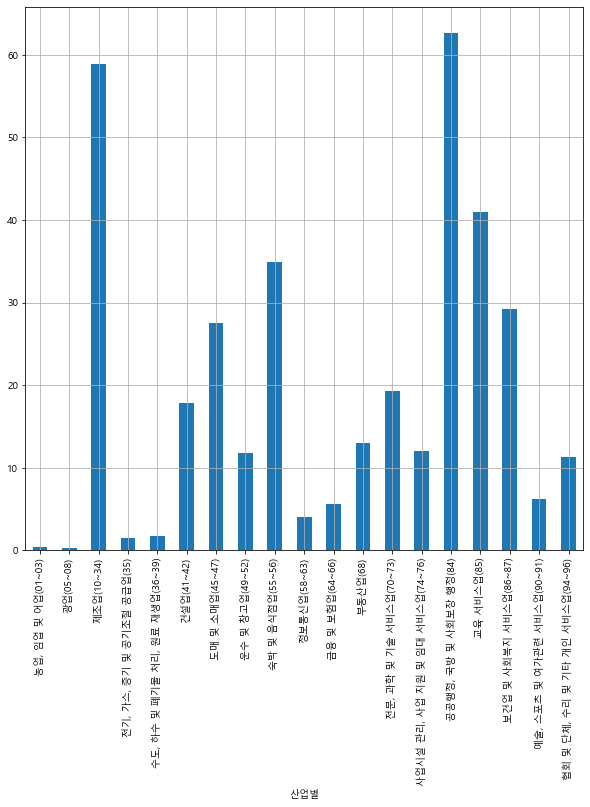

In [57]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='세종특별자치시']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년']=산업체2['2019 년']/국내인구.loc['세종특별자치시'].values
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

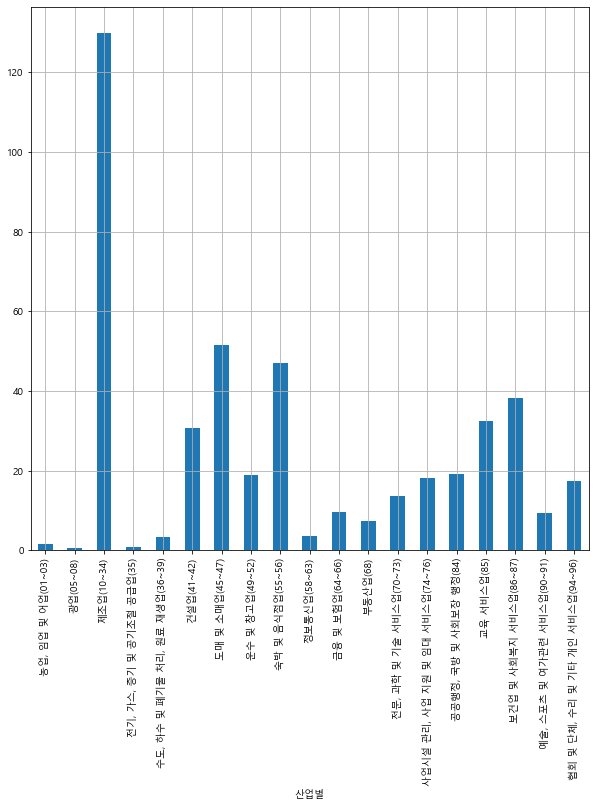

In [58]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='충청북도']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년']=산업체2['2019 년']/국내인구.loc['충청북도'].values
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

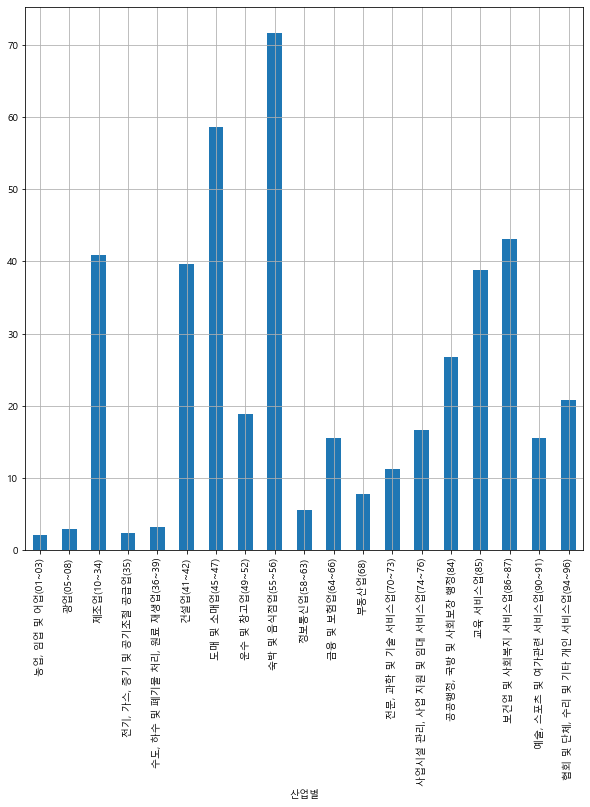

In [59]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='강원도']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년']=산업체2['2019 년']/국내인구.loc['강원도'].values
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

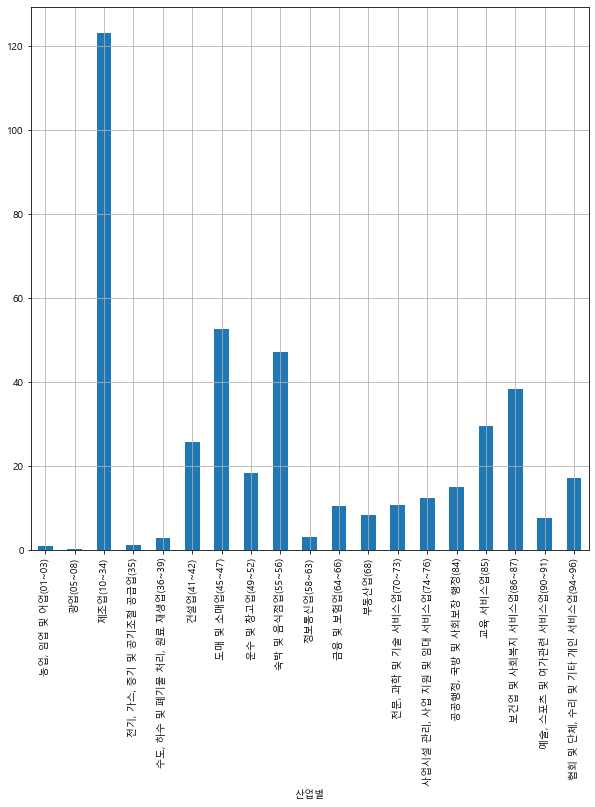

In [60]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='경상남도']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년']=산업체2['2019 년']/국내인구.loc['경상남도'].values
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

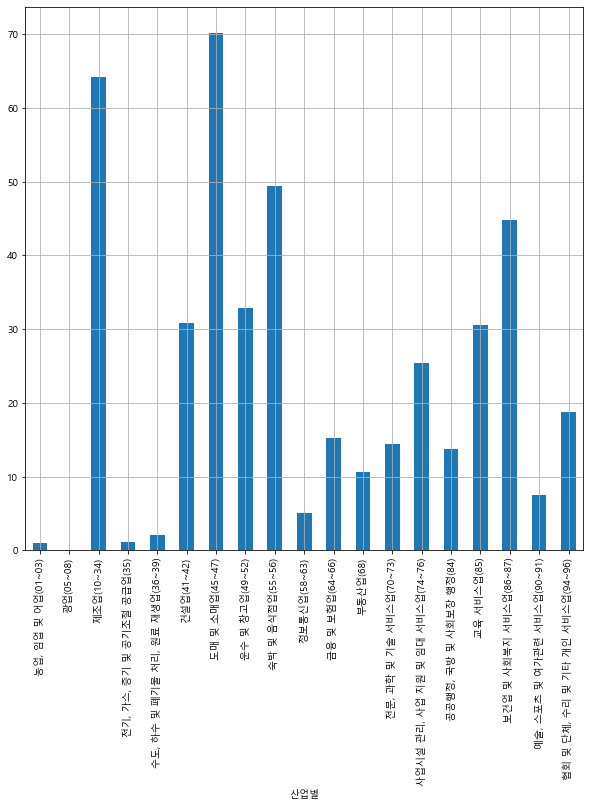

In [61]:
산업체2=산업체1.loc[산업체1['종사자규모별']=='계']
산업체2=산업체2.loc[산업체2['항목']=='종사자수']
산업체2=산업체2.loc[산업체2['행정구역별']=='부산광역시']
산업체2=산업체2.drop('전체 산업')
산업체2['2019 년']=산업체2['2019 년']/국내인구.loc['부산광역시'].values
산업체2['2019 년'].plot(kind='bar')
plt.grid(True)

In [62]:
산업체1_2=산업체.set_index('행정구역별')
산업체1_2=산업체1_2.loc[산업체1_2['종사자규모별']=='계']
산업체1_2=산업체1_2.loc[산업체1_2['항목']=='종사자수']
산업체1_2=산업체1_2.drop('전국')

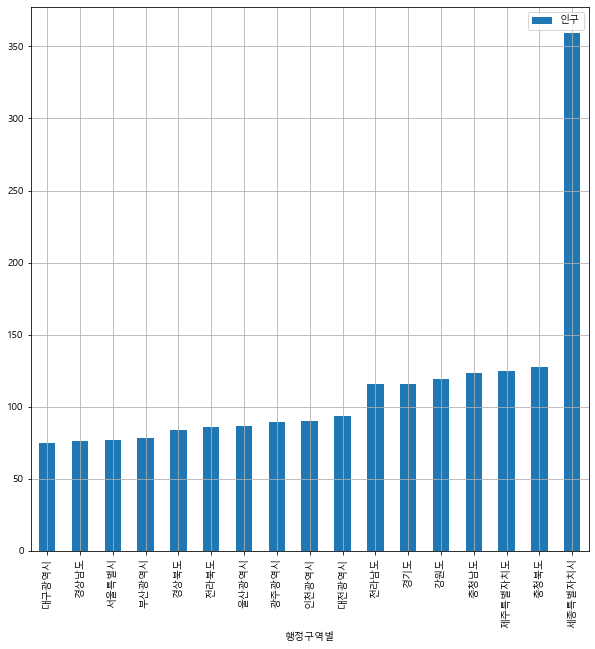

In [83]:
산업변화=((산업체1_2['2019 년'].loc[산업체1_2['산업별']=='전체 산업']-산업체1_2['2010 년'].loc[산업체1_2['산업별']=='전체 산업'])).to_frame()
산업변화.columns=['인구']
산업변화=산업변화/국내인구
산업변화.sort_values(by=['인구']).plot(kind='bar')
plt.grid(True)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


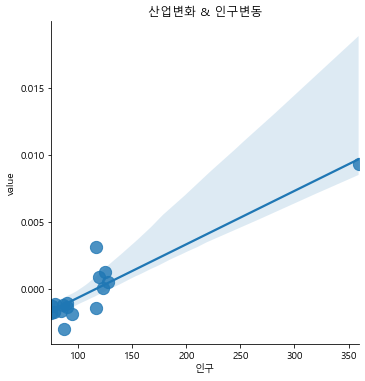

In [64]:
data = pd.concat([(산업변화),인구변동],axis=1)
g=sns.lmplot('인구','value',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('산업변화 & 인구변동')
plt.show(g)

In [65]:
data=mean_norm(data)
m1 = ols ( '인구~value', data=data).fit()
m1.summary()

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     인구   R-squared:                       0.859
Model:                            OLS   Adj. R-squared:                  0.850
Method:                 Least Squares   F-statistic:                     91.52
Date:                Wed, 29 Dec 2021   Prob (F-statistic):           8.92e-08
Time:                        16:38:45   Log-Likelihood:                -6.9445
No. Observations:                  17   AIC:                             17.89
Df Residuals:                      15   BIC:                             19.56
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept  -1.943e-16      0.094  -2.07e-15      1.000      -0.200       0.200
value          0.9269      0.097      9.566      0.000       0.720       1.133
==============================================================================
Omnibus:                        5.864   Durbin-Watson:                   1.863
Prob(Omnibus):                  0.053   Jarque-Bera (JB):                3.210
Skew:                          -0.690   Prob(JB):                        0.201
Kurtosis:                       4.622   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### 생활 만족도

Text(0.5, 1.0, '지역 만족도 조사')

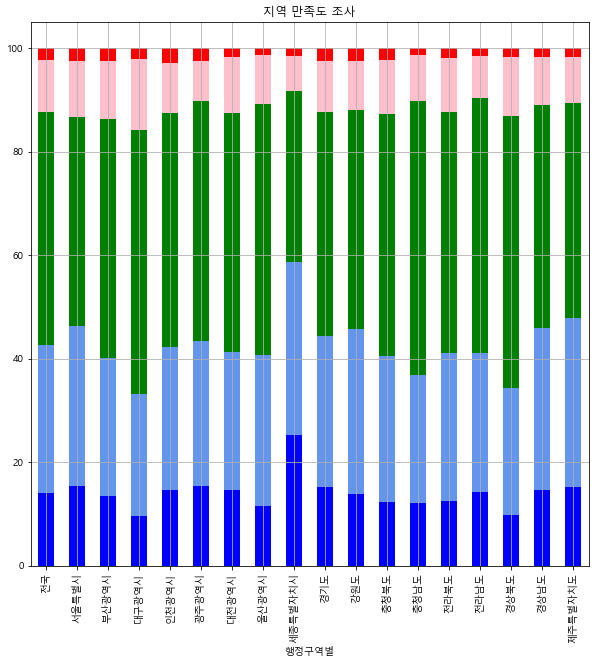

In [66]:
생활만족도2=생활만족도.loc[생활만족도['특성별']=='계']
생활만족도2=생활만족도2.loc[생활만족도2['항목']!='계']
b=생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 만족']
c=b+생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 만족']
d=c+생활만족도2['2020 년'].loc[생활만족도2['항목']=='보통']
e=d+생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 불만족']
생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 만족'].plot(kind='bar',color='blue',bottom=0)
생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 만족'].plot(kind='bar',color='cornflowerblue',bottom=b)
생활만족도2['2020 년'].loc[생활만족도2['항목']=='보통'].plot(kind='bar',color='green',bottom=c)
생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 불만족'].plot(kind='bar',color='pink',bottom=d)
생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 불만족'].plot(kind='bar',color='red',bottom=e)
plt.grid(True)
plt.title('지역 만족도 조사')

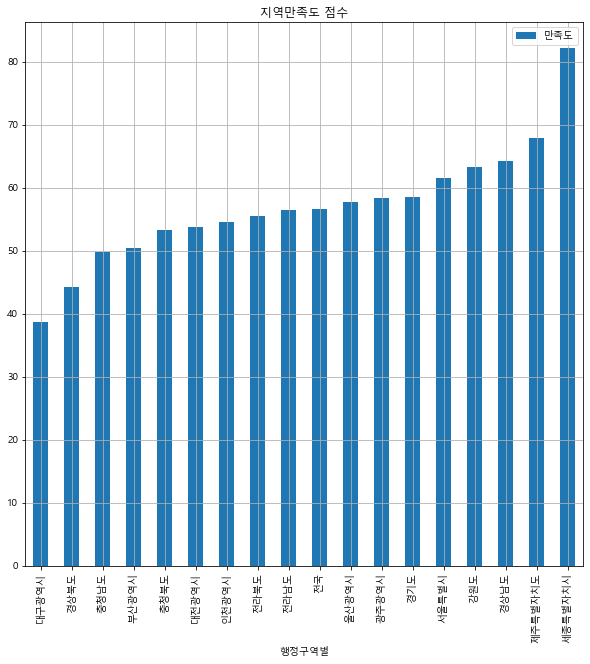

In [67]:
지역만족도=2*생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 만족']+생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 만족']-생활만족도2['2020 년'].loc[생활만족도2['항목']=='약간 불만족']-2*생활만족도2['2020 년'].loc[생활만족도2['항목']=='매우 불만족']
지역만족도=지역만족도.to_frame()
지역만족도.columns=['만족도']
지역만족도.sort_values(by='만족도').plot(kind='bar')
plt.title('지역만족도 점수')
plt.grid(True)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


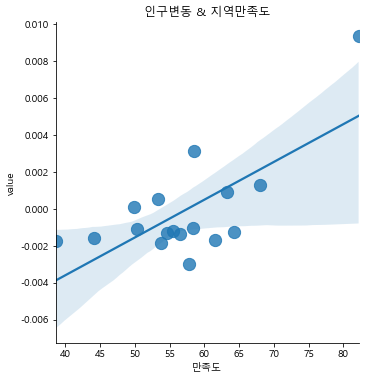

In [68]:
data = pd.concat([인구변동,지역만족도],axis=1)
g=sns.lmplot('만족도','value',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('인구변동 & 지역만족도')
plt.show(g)

In [69]:
data=mean_norm(data)
m1 = ols ( '만족도~value', data=data).fit()
m1.summary()

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\scipy\stats\stats.py:1604: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=17
  "anyway, n=%i" % int(n))


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    만족도   R-squared:                       0.488
Model:                            OLS   Adj. R-squared:                  0.454
Method:                 Least Squares   F-statistic:                     14.29
Date:                Wed, 29 Dec 2021   Prob (F-statistic):            0.00181
Time:                        16:38:48   Log-Likelihood:                -18.432
No. Observations:                  17   AIC:                             40.86
Df Residuals:                      15   BIC:                             42.53
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.0031      0.185      0.017      0.987      -0.391       0.397
value          0.7199      0.190      3.780      0.002       0.314       1.126
==============================================================================
Omnibus:                        1.005   Durbin-Watson:                   1.869
Prob(Omnibus):                  0.605   Jarque-Bera (JB):                0.918
Skew:                          -0.454   Prob(JB):                        0.632
Kurtosis:                       2.314   Cond. No.                         1.03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

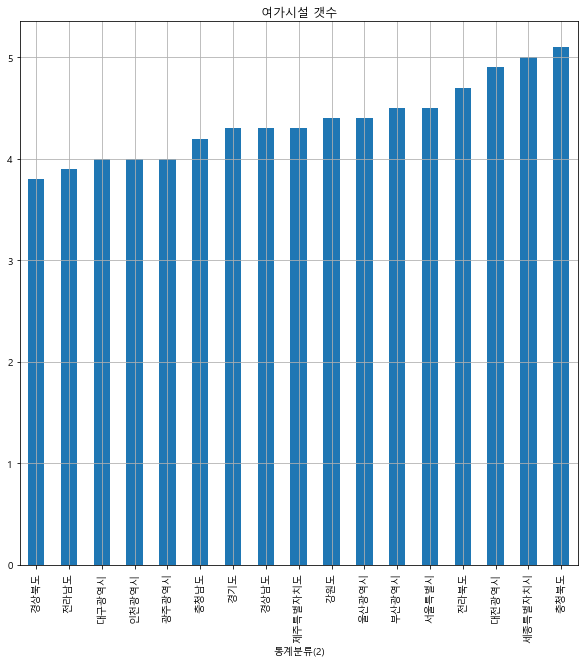

In [84]:
여가시설=여가시설.loc[여가시설['통계분류(1)']=='17개 시도별']
여가시설.평균.sort_values().plot(kind='bar')
plt.title('여가시설 갯수')
plt.grid(True)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


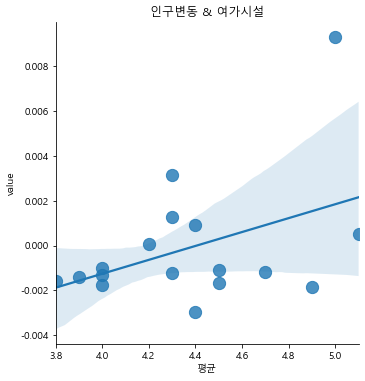

In [71]:
data = pd.concat([인구변동,여가시설],axis=1)
g=sns.lmplot('평균','value',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('인구변동 & 여가시설')
plt.show(g)

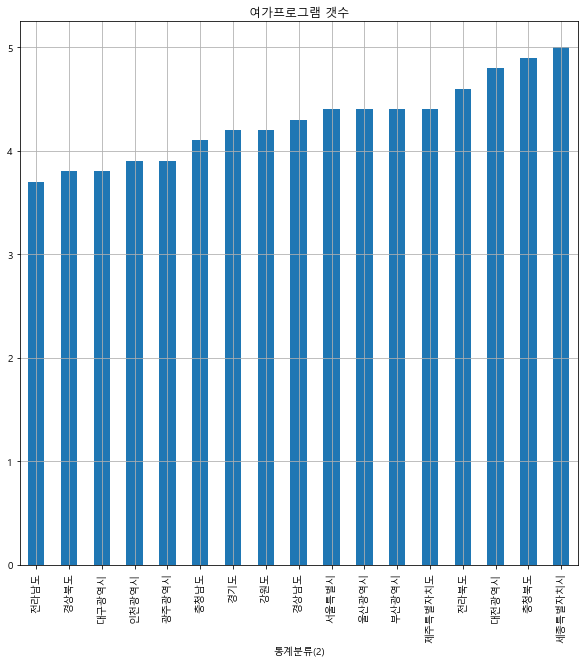

In [85]:
여가프로그램=여가프로그램.loc[여가프로그램['통계분류(1)']=='17개 시도별']
여가프로그램.평균1.sort_values().plot(kind='bar')
plt.title('여가프로그램 갯수')
plt.grid(True)

c:\users\ksy\anaconda3\envs\py368\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


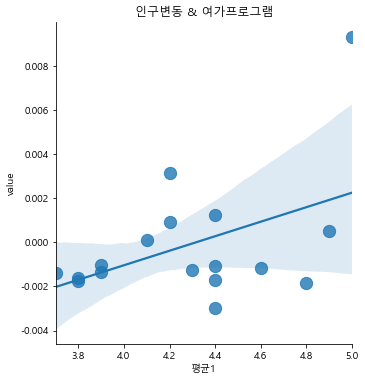

In [74]:
data = pd.concat([인구변동,여가프로그램],axis=1)
g=sns.lmplot('평균1','value',data=data,fit_reg=True,scatter_kws={"s":150})
plt.title('인구변동 & 여가프로그램')
plt.show(g)

### 요인3. 교육


In [75]:
취업자

,기업규모별(이동전)(1),기업규모별(이동전)(2),2019
졸업지역별(1),,,
전체,전체,소계,57439
전체,영리기업,소계,39832
전체,영리기업,대기업,9163
전체,영리기업,중소기업,30669
전체,비영리기업,소계,17607
수도권,전체,소계,22741
수도권,영리기업,소계,16586
수도권,영리기업,대기업,4479
수도권,영리기업,중소기업,12107


In [76]:
대학생['합계']=대학생.sum(axis=1)
대학생

,대학교 재학생수,일반대,전문대,교육대,산업대,합계
행정구역별,,,,,,
전국,2633787,1981003,621772,15628,15384,5267574
서울특별시,563889,507319,54964,1606,0,1127778
부산광역시,230984,186383,43033,1568,0,461968
대구광역시,114809,61667,51484,1658,0,229618
인천광역시,67160,43435,22412,1313,0,134320
광주광역시,108225,82338,24498,1389,0,216450
대전광역시,134526,108791,25735,0,0,269052
울산광역시,32080,20509,11571,0,0,64160
세종특별자치시,22558,17852,4706,0,0,45116


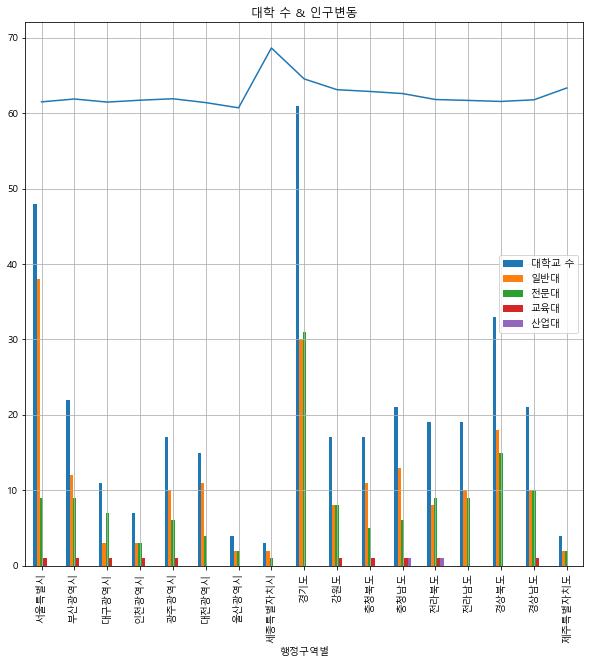

In [77]:

대학.drop(['전국']).plot(kind='bar')
plt.plot((인구변동+1.5)**15/7) # 추이를 보기위한 정규화
plt.title('대학 수 & 인구변동')
plt.grid(True)

In [79]:
수도권대학생=대학생.loc[['서울특별시','인천광역시','경기도'],'합계'].sum()
비수도권대학생=대학생.loc[['전국'],'합계']-수도권대학생
비수도권대학생=비수도권대학생.sum()

<BarContainer object of 2 artists>

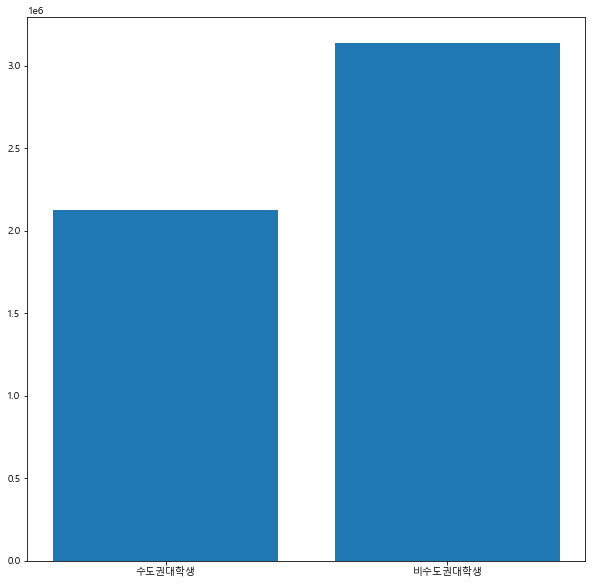

In [80]:
plt.bar(['수도권대학생','비수도권대학생'],[수도권대학생,비수도권대학생])

In [81]:
취업자.loc[['수도권'],'2019']=취업자.loc[['수도권'],'2019']/수도권대학생
취업자.loc[['비수도권'],'2019']=취업자.loc[['비수도권'],'2019']/비수도권대학생

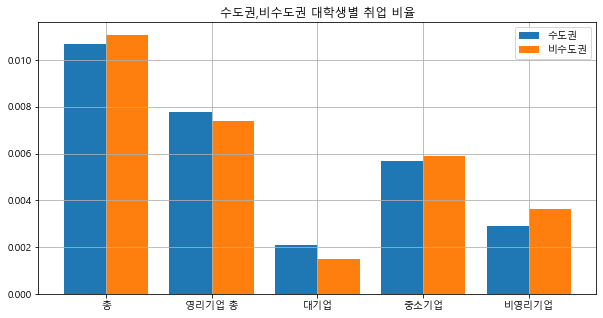

In [82]:
n = 1  # dataset 
t = 2 # Number of dataset
d = 5 # Number of sets of bars
w = 0.8 # Width of each bar
plt.figure(figsize=(10,5))
store2_x = [t*element + w*n for element in range(d)]
plt.bar(store2_x, 취업자.loc[['수도권'],'2019'])

n = 2  
t = 2 
d = 5 
w = 0.8 
store1_x = [t*element + w*n for element in range(d)]
plt.bar(store1_x, 취업자.loc[['비수도권'],'2019'])


plt.xticks([1.2,3.2,5.2,7.2,9.2], ['총','영리기업 총','대기업','중소기업','비영리기업'])
plt.title('수도권,비수도권 대학생별 취업 비율')
plt.legend(['수도권','비수도권'])
plt.grid(True)